# MAP estimator for $m$-QAM constellations

In the problem of maximum a posteriori (MAP) estimation for digital communication over Gaussian channels, $X$ is a discrete random variable with alphabet $\{x_1,x_2,\ldots,x_M\}$, $x\in\mathbb{C}$ in general (the constellation), and respective probabilities $\{p_1,p_2,\ldots,p_M\}$, and $Y$ is a continuous random variablem of a channel observation. The detector must decide which symbol was sent given the observation $Y$, and a MAP estimator must perform the following optimization:

$\hat{x}_i = \arg\max_{x_i} f_{X|Y}(x_i|y)$,

that is, finding the argument $x_i$ that maximizes the probability $f_{X|Y}$, given an outcome $y$. The result, $\hat{x}_i$, is the detector output.

In a general manner, the constellation symbols are complex valued, $x_i\in\mathbb{C}$, so are the observations $Y$. By considering the additive channel model $Y = X + Z$, where $Z$ is a realization of a complex Gaussian random variable with zero mean and variance $\sigma^2 = N_0/2$ per quadrature independent of $X$, the conditional density is

$f_{Y|X}(y|x_i) = \frac{1}{\pi N_0}e^{-\frac{|y-x_i|^2}{N_0}}$.

Using Baye's rule, one has that $f(x_i|y) = f(y|x_i)p(x_i)/p(y)$, where $p(y) = \sum_if(y|x_i)$. Once $p(y)$ does not depends on $x_i$, the MAP estimator can be reestated as:

$$
\begin{align}
    \hat{x} &= \arg\max_{x_i} f_{Y|X}(y|x_i)p(x_i)\\ 
     &= \arg\max_i p(x_i) \cdot  \frac{1}{\pi N_0}e^{-\frac{|y-x_i|^2}{N_0}}\\
     &= \arg\max_{x_i} p(x_i) \cdot e^{-\frac{|y-x_i|^2}{N_0}}\\
     &= \arg\max_{x_i}\left[ \ln(p(x_i)) -\frac{|y-x_i|^2}{N_0}\right]\\
     &= \arg\max_{x_i}\left[ \frac{N_0}{2}\ln(p(x_i)) -\frac{1}{2}|y-x_i|^2\right]
\end{align}
$$

The expression above employs a MAP estimator for an observation $y$ given the constellation values $x_i$, its probabilities $p_i$ and the channel parameter $E_0$. Observe that if the channel has noise variance $N_0=0$, the a priori probabilities are negligible and the euclidian distance is sufficient for decision. In fact, the constellation distribution becomes influent in the decision as the channel noise increases.

In the specifc case of equiprobable symbols, $p(x_i) = 1/M$, the decision is called a maximum likelihood and only the euclidian distance is considered in the maximization. The detector, in this case, can be called a minimum distance detector,

$$
\begin{equation}
    \hat{x}_i = \arg\min_{x_i}|y-x_i|^2,
\end{equation}
$$

and, despite not being an optimal decision rule for the general case, it is widely employed due to its simplicity. The following function implements the MAP estimator.

In [1]:
# MAP Estimator

import numpy as np

def map_estimator_distance_metric(y, x_list, prob_x, N_0):
    x = np.array(x_list)
    px = np.array(prob_x) 
      
    dist = np.abs(y - x)**2
    map_func = (N_0/2)*np.log(prob_x) - dist/2
    
    return x[map_func.argmax()]

## Example: transmission over an AWGN channel

Consider an AWGN channel with noise variance $\sigma^2 = E_0/2$ per quadrature and an equiprobable $m$-QAM constellation ($m = n^2$).

Constellation symbols: [-1.-1.j  0.-1.j  1.-1.j -1.+0.j  0.+0.j  1.+0.j -1.+1.j  0.+1.j  1.+1.j]
Constellation distribution:  [0.111 0.111 0.111 0.111 0.111 0.111 0.111 0.111 0.111]


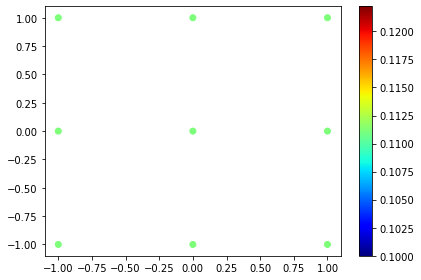

In [2]:
# Constellation parameters
n = 3
m = n**2
# constellation points per axis
points = np.linspace(0, n-1,num=n) - (n-1)/2
# real and imaginary parts of the nxn array
xv, yv = np.meshgrid(points, points)

x = xv + 1j*yv
x = x.reshape(1,-1)[0]
p_x = list(np.ones(m)/m)

print('Constellation symbols:', x)
print('Constellation distribution: ', np.round(p_x, 3))
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(xv,  # x coordinates
            yv,  # y coordinates
            c=p_x, # probability distribution
            cmap='jet') # constellation plot
plt.colorbar()
plt.tight_layout()

In each communication round, an $i\in\{0,1,\ldots, m\}$ is chosen equiprobably and sent through the channel, resulting in an output $y = x_i + z$. The channel output is then used to estimate $\hat{x}$

X sent: 1j
Channel output: (-0.2056+0.7562j)
MAP output:  1j


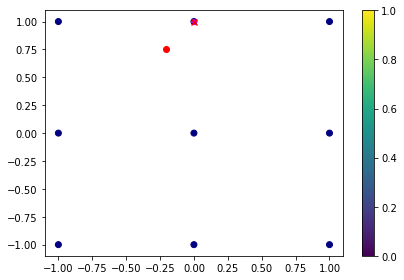

In [3]:
i = np.random.randint(0,n**2) # transmitted signal index
x_sent = x[i] # transmitted signal
N0 = 1 # channel noise variance

Z = np.random.normal # noise normal random variable
z = Z(loc=0, scale = N0/2) + Z(loc=0, scale = N0/2)*1j # noise sample
y = x_sent + z # channel output

print('X sent:', x_sent)
print('Channel output:', np.round(y,4))

# x_hat = map_estimator(y, x, p_x, N0)
x_hat = map_estimator_distance_metric(y, x, p_x, N0) # estimated channel input
print('MAP output: ', x_hat)

# Plot: constellation, transmitted symbol, received symbol and estimated x_i
plt.figure()
plt.scatter(xv,  # x coordinates
            yv,  # y coordinates
            c=p_x,
            cmap='jet') # constellation plot

plt.scatter(np.real(x_sent), np.imag(x_sent), c='magenta', marker='+') # symbol sent
plt.scatter(np.real(y), np.imag(y), c='red') # signal received
plt.scatter(np.real(x_hat), np.imag(x_hat), c='red', marker='x') # Symbol estimated

plt.colorbar()
plt.tight_layout()

## Decision regions

Given the decision rule at detection, the complex plane has an induced partition which results on $m$ regions $D_1, \ldots, D_m$ such that if the channel outputs $y\in D_k$, the estimator will decide for $\hat{x}_k$. Those regions are called the decision regions and each $D_k$ is the set of all channel outputs that are mapped to $x_k$ by the detector.

In the following, we plot the decision regions boundaries for a given constellation using the MAP criterion. We consider an AWGN channel with noise variance $N_0/2$ per quadrature. As was stated before, the MAP estimation is not affected by the a priori probabilities if $N_0 = 0$. It can be seen that the channel noise modify the decision regions only in the case of non equiprobable constellations.

Lets begin by redefining the constellation with equiprobable symbols.

In [54]:
# Constellation parameters
n = 3
m = n**2
# constellation points per axis
points = np.linspace(0, n-1,num=n) - (n-1)/2
# real and imaginary parts of the nxn array
xv, yv = np.meshgrid(points, points)

x = xv + 1j*yv
x = x.reshape(1,-1)[0]
p_x = list(np.ones(m)/m)

In the following, we show a function that plots the decision regions for a given constellation and probability distribution. The function works as follows. 

The functions creates a dense grid of points in the complex plane, each point to be estimated with map_estimator_distance_metric(), forming a decision region to each constellation symbol. Next, the MAP estimator is used to each point in the grid, resulting on the partition of the constellation regions. Then, by associating each grid point with the respective MAP estimatives, it plots the decision regions.

In [55]:
def DecisionRegions(const, probs, N0, mash_factor=100):
    
    import shapely.geometry as geometry
    
    delta = (np.real(x).max() - np.real(x).min())/((np.sqrt(x.size)-1)*2)
    const_max = np.max(np.real(x))
    const_min = np.min(np.real(x))
    grid_max = const_max + delta
    grid_min = const_min - delta

    mesh = n*mash_factor
    xx, yy = np.meshgrid(np.linspace(grid_min,grid_max, mesh), np.linspace(grid_min,grid_max, mesh))
    
    grid = []
    for i in np.arange(mesh):
        for j in np.arange(mesh):
            to_class = xx[i,j] + 1j*yy[i,j]

            grid += [to_class, map_estimator_distance_metric(to_class, x, p_x, N0)]

    grid = np.array(grid).reshape(-1,2)
    
    plt.figure()
    #plt.scatter(np.real(x), np.imag(x))
    for i in np.arange(x.size): # The first loop will run on the constellation points
        cont = np.array([], dtype = complex) # stores the grid points estimated as the constellation symbol x_i

        for j in np.arange(grid.shape[0]):
            if grid[j,1] == x[i]:  
                cont = np.append(cont, grid[j,0])

        # avoids constellation points without associated grid points (an exception security measure)
        if np.size(cont) != 0: 

            # real and imaginary parts of the grid points associated with the symbol x_i
            cont_x = np.real(cont)
            cont_y = np.imag(cont)
            # convert the list of grid points associated with the symbol x_i into a list of touples.
            # this format is necessary to use the function in the shapely package
            points = [(cont_x[i], cont_y[i]) for i in np.arange(cont.size)]

            # shapely.geometry.Multipoint helps to get the boundary of the convex hull of the points of cont.
            # the convex hull of the points in the variable cont is exactly the decision region for the symbol x_i
            Points = geometry.MultiPoint(points) # set of points
            boundary = Points.convex_hull.boundary # Points of 'cont' forming the boundary of its convex hull
            # adjust the boundary points for ploting
            region_coords = list(boundary.coords)
            a = [region_coords[i][0] for i in np.arange(np.shape(region_coords)[0])]
            b = [region_coords[i][1] for i in np.arange(np.shape(region_coords)[0])]
            plt.plot(a, b,'k')
    plt.scatter(np.real(x), np.imag(x), c = p_x, cmap='jet')
    plt.colorbar()
    plt.tight_layout()

Applying DecisionRegions() to the constellation defined above, we get the result:

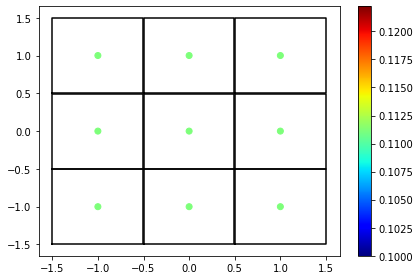

In [56]:
N0 = 1
DecisionRegions(x, p_x, N0)

It can be verifyed that the value of $N_0$ does not modify the regions. 

Now, lets consider the following non equiprobable constellation:

In [57]:
x = np.array([-1-1j, -1, -1+1j,  -1j,  0,  1j, 1-1j, 1,  1+1j]).reshape(1,-1)[0]
p_x = np.array([0.0625, 0.125 , 0.0625, 0.125 , 0.25  , 0.125 , 0.0625, 0.125 , 0.0625]).reshape(1,-1)[0]

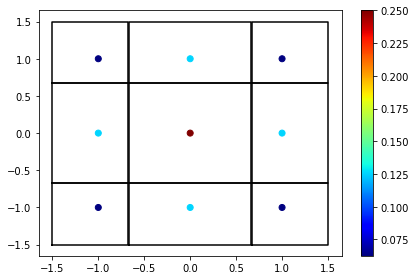

In [58]:
N0 = 0.5
DecisionRegions(x, p_x, N0)

By changing the value of $N_0$, the decision regions are modifyed due to an amplification effect on the contribution of the a priori probabilities on the MAP estimator.